In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
os.getcwd()
df = pd.read_csv("../../../../Datasets/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Number of passengers in original data :  " + str(len(df.index)))

Number of passengers in original data :  891


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Analyzing the data

<Axes: xlabel='Survived', ylabel='count'>

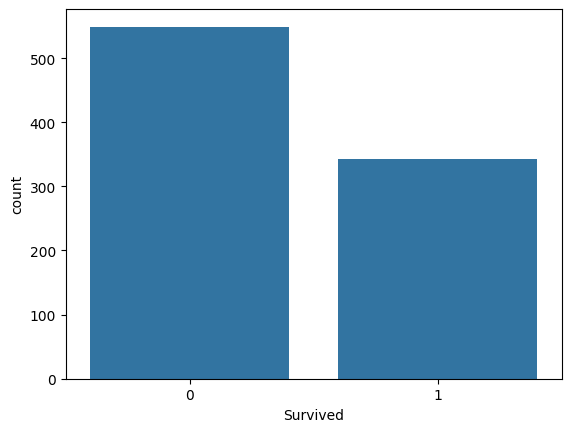

In [6]:
#Count plot
sns.countplot(x = "Survived", data = df)

<Axes: xlabel='Survived', ylabel='count'>

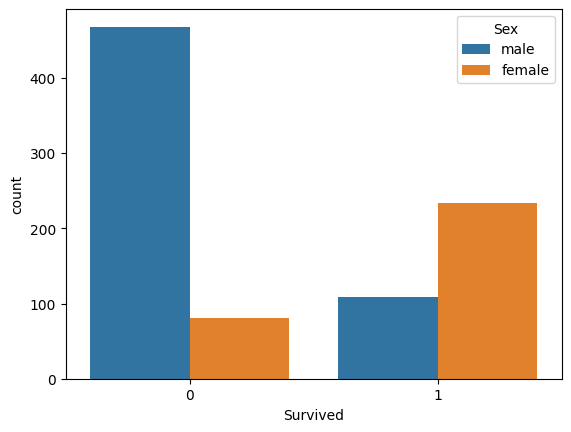

In [7]:
sns.countplot(x = "Survived", hue = "Sex", data = df)

<Axes: xlabel='Survived', ylabel='count'>

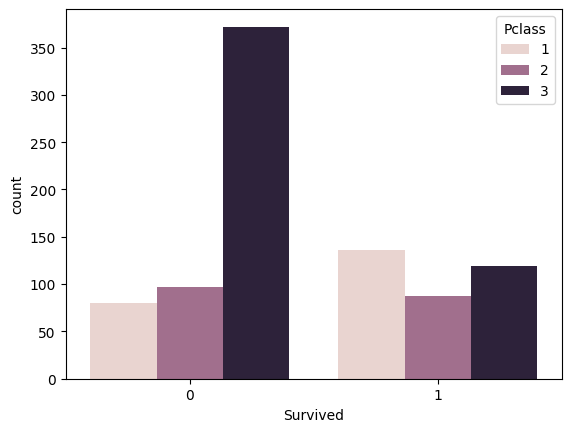

In [8]:
sns.countplot(x = "Survived", hue = "Pclass", data = df)

<Axes: ylabel='Frequency'>

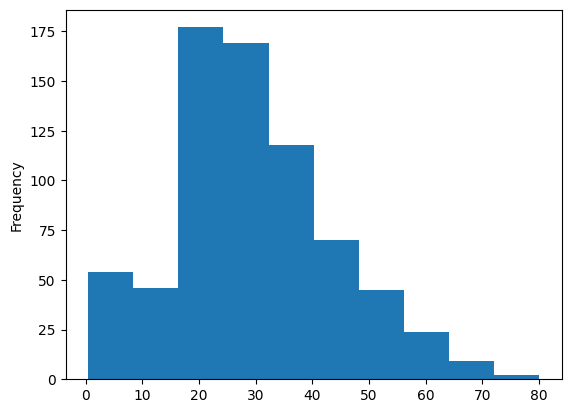

In [9]:
df["Age"].plot.hist()

<Axes: ylabel='Frequency'>

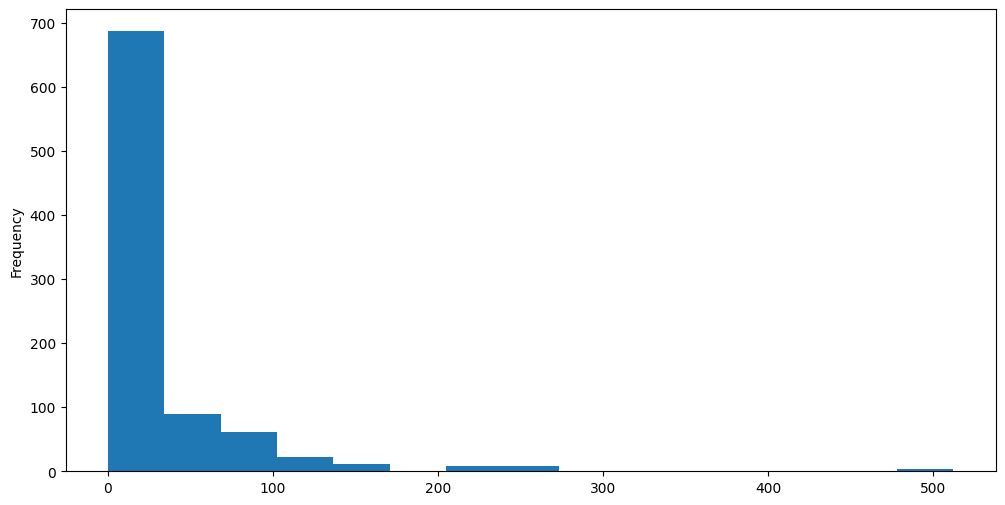

In [10]:
df["Fare"].plot.hist(bins = 15, figsize = (12,6))

<Axes: xlabel='SibSp', ylabel='count'>

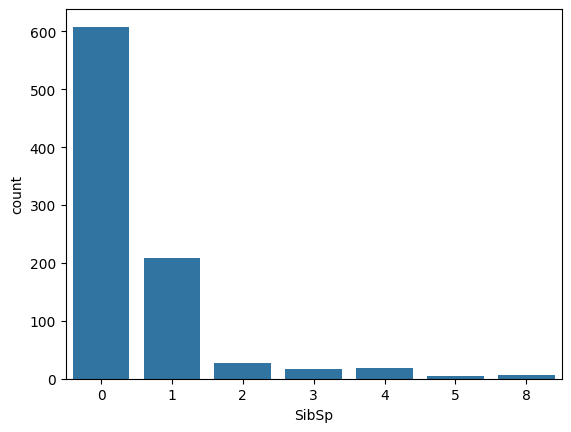

In [11]:
sns.countplot(x = "SibSp", data = df)

<Axes: xlabel='Parch', ylabel='count'>

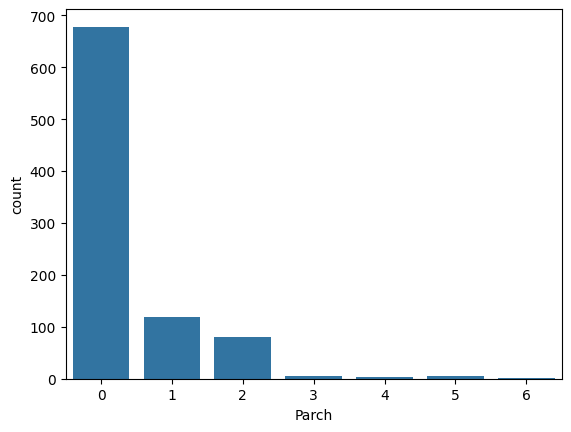

In [12]:
sns.countplot(x = "Parch", data = df)

# Data Wrangling

In [13]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

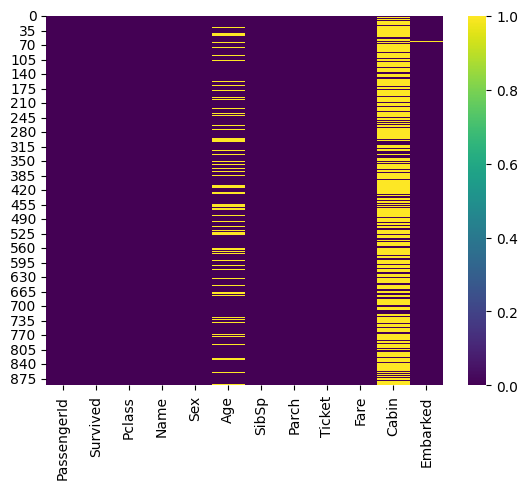

In [15]:
sns.heatmap(df.isnull(), cmap = "viridis")

<Axes: xlabel='Pclass', ylabel='Age'>

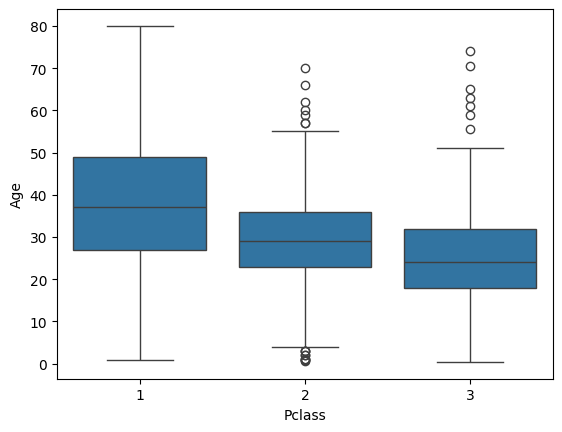

In [16]:
sns.boxplot(x = "Pclass", y = "Age", data = df)

In [17]:
df.drop("Cabin", axis = 1, inplace = True)

In [18]:
df.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [19]:
## Fill missing values in Age feature with each sex’s mean value of Age 
df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('mean'))

<Axes: ylabel='Frequency'>

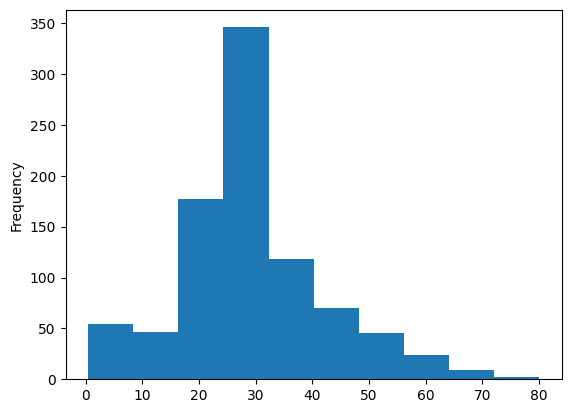

In [20]:
df["Age"].plot.hist()

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [22]:
#Embarked column contains 2 Null values
df.dropna(inplace = True) #Removes entire row having atleast 1 Null value.
df.shape

(889, 11)

<Axes: >

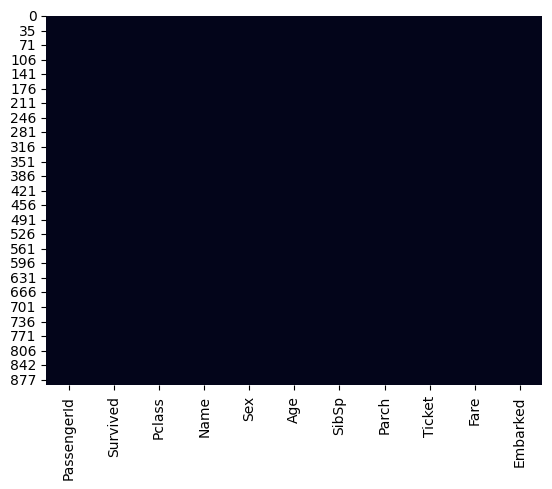

In [23]:
sns.heatmap(df.isnull(), cbar = 0)

In [24]:
sex = pd.get_dummies(df['Sex'], drop_first = 1)
sex.head(7)

,male
0,True
1,False
2,False
3,False
4,True
5,True
6,True


In [25]:
embark = pd.get_dummies(df['Embarked'], drop_first = 1)
embark.head(7)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
5,True,False
6,False,True


In [26]:
pclass = pd.get_dummies(df['Pclass'], drop_first = 1)
pclass.head(7)

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True
5,False,True
6,False,False


In [27]:
df=pd.concat([df,sex,embark,pclass],axis = 1)
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,True,False,True,False,True
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,Q,True,True,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,True,False,True,False,False


In [28]:
df.drop(['Name','Sex','Ticket','Embarked','PassengerId','Pclass'], axis = 1, inplace = True)

In [29]:
df.head(7)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.000000,1,0,7.2500,True,False,True,False,True
1,1,38.000000,1,0,71.2833,False,False,False,False,False
2,1,26.000000,0,0,7.9250,False,False,True,False,True
3,1,35.000000,1,0,53.1000,False,False,True,False,False
4,0,35.000000,0,0,8.0500,True,False,True,False,True
5,0,30.726645,0,0,8.4583,True,True,False,False,True
6,0,54.000000,0,0,51.8625,True,False,True,False,False


# Splitting the dataset

In [30]:
X = df.drop("Survived",axis = 1)
y = df["Survived"]
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (889, 9)
y shape: (889,)


In [31]:
X.head(7)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.000000,1,0,7.2500,True,False,True,False,True
1,38.000000,1,0,71.2833,False,False,False,False,False
2,26.000000,0,0,7.9250,False,False,True,False,True
3,35.000000,1,0,53.1000,False,False,True,False,False
4,35.000000,0,0,8.0500,True,False,True,False,True
5,30.726645,0,0,8.4583,True,True,False,False,True
6,54.000000,0,0,51.8625,True,False,True,False,False


In [32]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (666, 9)
X_test shape: (223, 9)
y_train shape: (666,)
y_test shape: (223,)


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lgr = LogisticRegression()

In [37]:
lgr.fit(X_train.values,y_train.values)

C:\Users\vinaysangam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [38]:
y_pred = lgr.predict(X_test.values)

In [39]:
from sklearn.metrics import classification_report

In [40]:
# classification_report(y_test, y_pred)

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.780142,0.833333,0.805861,132.000000
1,0.731707,0.659341,0.693642,91.000000
accuracy,0.762332,0.762332,0.762332,0.762332
macro avg,0.755925,0.746337,0.749751,223.000000
weighted avg,0.760377,0.762332,0.760067,223.000000


In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test,y_pred)

array([[110,  22],
       [ 31,  60]])

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test,y_pred)*100

76.23318385650224

## Building a Logistic Regression with Cost Function and Gradient Descent

In [45]:
X = X.astype(float)
y = y.astype(float).ravel()
theta = np.zeros(X.shape[1])

C:\Users\vinaysangam\AppData\Local\Temp\ipykernel_16612\1083262686.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = y.astype(float).ravel()


In [46]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [47]:
def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,x)) - y)

In [48]:
from scipy.optimize import fmin_tnc
def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(x, y))
    return opt_weights[0]
parameters = fit(X, y, theta)

In [49]:
theta.shape

(9,)

In [50]:
X.shape

(889, 9)

In [51]:
y.shape

(889,)

In [52]:
parameters

array([ 0.00341734, -0.25184765, -0.07741027,  0.01734696, -2.17716814,
        0.54833362,  0.24141214,  0.61614408, -0.22973958])

In [53]:
def predict(x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)
def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100
accuracy(X, y)

np.float64(78.51518560179977)

## PCA

In [54]:
X.head(7)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.000000,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,1.0
1,38.000000,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,0.0
2,26.000000,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,1.0
3,35.000000,1.0,0.0,53.1000,0.0,0.0,1.0,0.0,0.0
4,35.000000,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,1.0
5,30.726645,0.0,0.0,8.4583,1.0,1.0,0.0,0.0,1.0
6,54.000000,0.0,0.0,51.8625,1.0,0.0,1.0,0.0,0.0


In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(np.array(X, dtype=float))
principalComponents

array([[-25.02655705,  -7.09684223],
       [ 39.37970699,   7.35970265],
       [-24.25713681,  -3.09866709],
       ...,
       [ -8.68027323,  -1.60411849],
       [ -2.18520083,  -3.61473918],
       [-24.28831571,   2.90615168]])

In [56]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [57]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1.

In [58]:
# finalDf = pd.concat([principalDf, y], axis = 1)

finalDf = pd.concat([principalDf, pd.Series(y, name="Survived")], axis=1)

In [59]:
finalDf.shape

(889, 3)

In [60]:
finalDf.head(7)

,principal component 1,principal component 2,Survived
0,-25.026557,-7.096842,0.0
1,39.379707,7.359703,1.0
2,-24.257137,-3.098667,1.0
3,21.128324,4.798222,1.0
4,-23.916884,5.897062,0.0
5,-23.610943,1.616626,0.0
6,20.344092,23.841759,0.0


In [61]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.93569247 0.06334377]


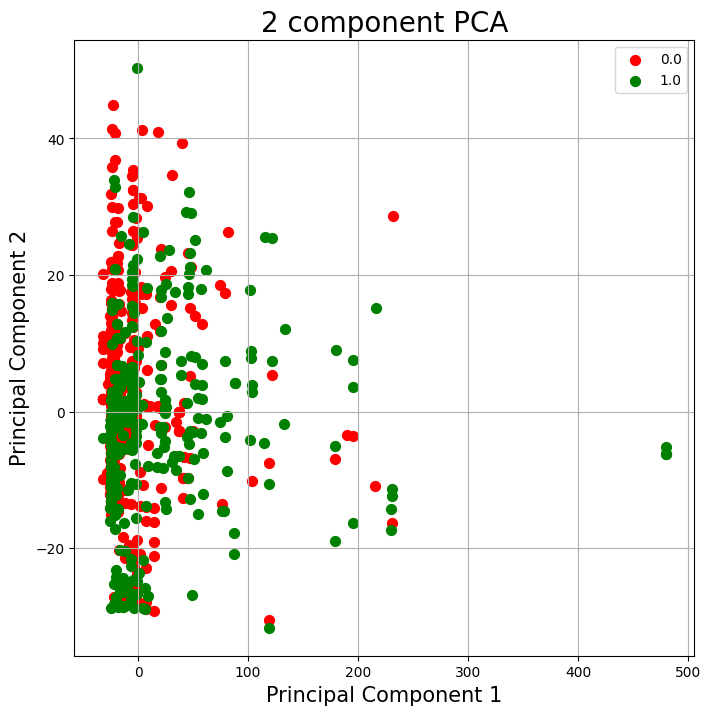

In [62]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0, 1.0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Survived'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

## t-SNE

In [63]:
import swat
from time import time
%matplotlib inline

In [64]:
from sklearn.manifold import TSNE

In [65]:
X

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.000000,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,1.0
1,38.000000,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,0.0
2,26.000000,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,1.0
3,35.000000,1.0,0.0,53.1000,0.0,0.0,1.0,0.0,0.0
4,35.000000,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,27.000000,0.0,0.0,13.0000,1.0,0.0,1.0,1.0,0.0
887,19.000000,0.0,0.0,30.0000,0.0,0.0,1.0,0.0,0.0
888,27.915709,1.0,2.0,23.4500,0.0,0.0,1.0,0.0,1.0
889,26.000000,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,0.0


In [66]:
# X3 = TSNE(n_components = 2).fit_transform(X)

X3 = TSNE(n_components=2).fit_transform(np.array(X, dtype=float))

In [67]:
X3

array([[-21.821402 , -18.519478 ],
       [ 41.90857  ,  -1.8010348],
       [-27.6238   ,  -9.699926 ],
       ...,
       [  6.993219 ,  -2.2507062],
       [ 13.331466 ,  -4.471399 ],
       [-32.119015 ,  24.129892 ]], dtype=float32)

In [68]:
tsneDf = pd.DataFrame(data = X3, columns = ['tsne component 1', 'tsne component 2'])

In [69]:
tsneDf.head()

,tsne component 1,tsne component 2
0,-21.821402,-18.519478
1,41.908569,-1.801035
2,-27.623800,-9.699926
3,32.910641,-2.245814
4,-15.474152,19.285599


In [70]:
tsnefinal = pd.concat([tsneDf, pd.Series(y, name="Survived")], axis = 1)
tsnefinal.head()

,tsne component 1,tsne component 2,Survived
0,-21.821402,-18.519478,0.0
1,41.908569,-1.801035,1.0
2,-27.623800,-9.699926,1.0
3,32.910641,-2.245814,1.0
4,-15.474152,19.285599,0.0


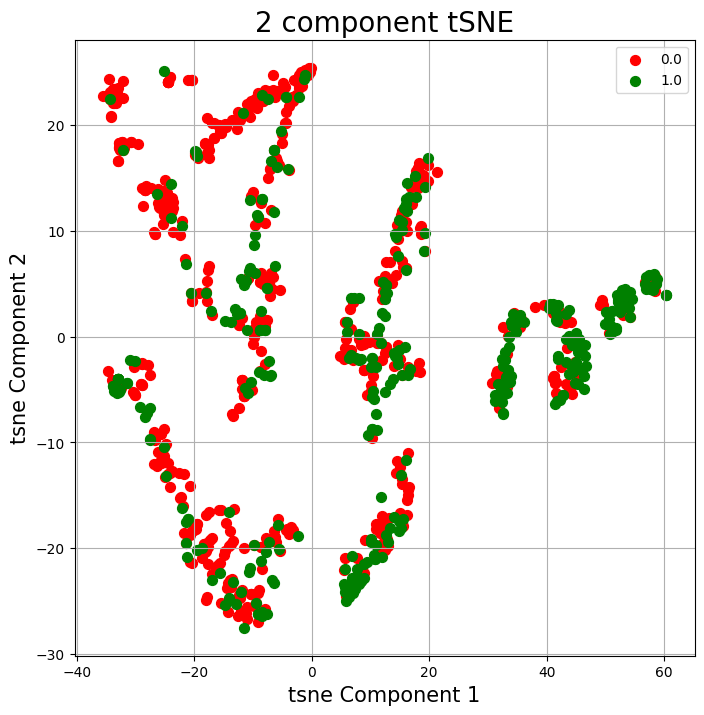

In [71]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15)
ax.set_ylabel('tsne Component 2', fontsize = 15)
ax.set_title('2 component tSNE', fontsize = 20)
targets = [0.0, 1.0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = tsnefinal['Survived'] == target
    ax.scatter(tsnefinal.loc[indicesToKeep, 'tsne component 1'],
               tsnefinal.loc[indicesToKeep, 'tsne component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()